In [1]:
%load_ext autoreload
%autoreload 2
import sys  
sys.path.insert(0, '../')
import torch 
import plotly.graph_objects as go
import numpy as np
import plotly.offline as pyo
from scipy import ndimage
pyo.init_notebook_mode()
torch.set_printoptions(sci_mode=False)

In [2]:
import matplotlib.pyplot as plt
from src.utils.plot_utils import *
from src.datamodules.datasets.handpose_dataset import HandposeDataset
from src.datamodules.default_datamodule import DefaultDataModule
from torchvision.transforms import Compose, Resize, ToTensor, ToPILImage
from PIL import Image

In [3]:
data = HandposeDataset(root="../data")

Preprocessing handpose dataset...
Done, preprocessed 110704 data points (train=True).


In [4]:
def plot_hand(img, K, kp3d):
    kp2d = kp3d_to_kp2d(kp3d, K)
    return plot_fingers2D(kp2d, img_rgb=img)

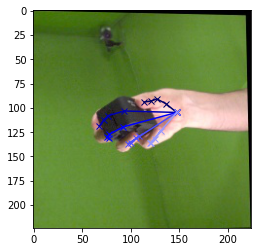

In [5]:
ax1 = plot_hand(*data[5])

In [6]:
transforms = Compose([Resize(size=(128,128)), ToTensor()])
img = ToTensor()(data[0][0])

In [7]:
import src.utils.plot_utils as utils
from src.models.metrics.submission_metric import procrustes
data = HandposeDataset(root="../data")

Preprocessing handpose dataset...
Done, preprocessed 110704 data points (train=True).


In [8]:
img, cam, points = data.__getitem__(5)
points_preds = points + 5*torch.rand((21, 3))
points_preds_proc = procrustes(points_preds.unsqueeze(0), points.unsqueeze(0)).squeeze()
print(points_preds_proc.shape)
utils.plot_hand_3D(points_preds_proc, points_preds).show()
#utils.plot_hand_3D(points_preds_proc, points)

torch.Size([21, 3])


<PIL.Image.Image image mode=RGB size=224x224 at 0x171C6DB50>


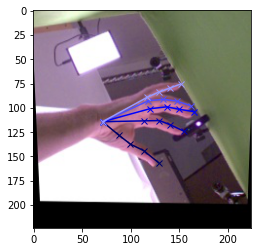

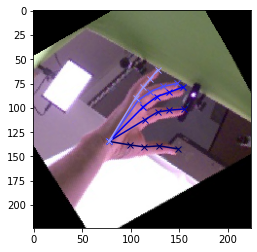

In [10]:
# Test rotations


import random
import torch
import numpy as np
from torch import nn, Tensor
from torchvision import transforms
from torchvision.transforms import functional as F
from scipy.spatial.transform import Rotation as R

img, cam, points = data.__getitem__(75)
# Plot current points and hand
plot_fingers2D(kp3d_to_kp2d(points, cam), img)
print(img)

class Transform:
    
    @staticmethod
    def rotate(points: Tensor, degrees: float):
        radians = np.radians(-degrees)
        rotation_vector = np.array([0, 0, radians])
        rotation = R.from_rotvec(rotation_vector)
        points = rotation.apply(points)
        return torch.tensor(points)

              
degrees = 30 
rotated_img = F.rotate(img, degrees, F.InterpolationMode.NEAREST, expand=False, center=None, fill=None)
rotated_points = Transform.rotate(points, degrees=degrees)

#print(points) 
#print(rotated_points)    
#print(Transform.rotate(rotated_points, degrees=-degrees))  

# Plot rotated points and hand
plot_fingers2D(kp3d_to_kp2d(rotated_points, cam), rotated_img)
utils.plot_hand_3D(points, rotated_points).show()

Preprocessing handpose dataset...
Done, preprocessed 110704 data points (train=True).
torch.Size([8, 21, 2])



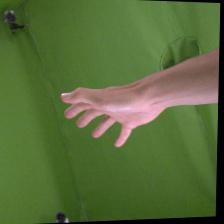
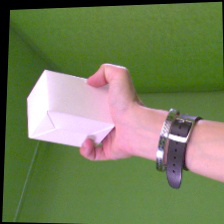
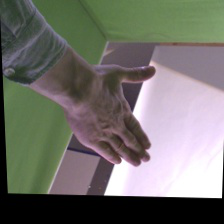
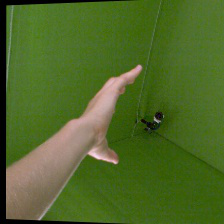
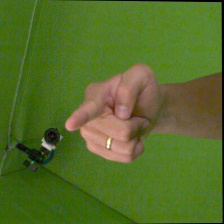
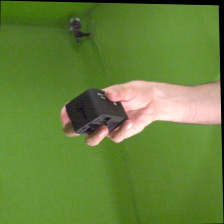
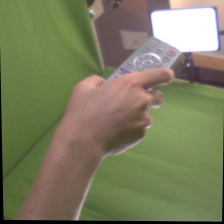
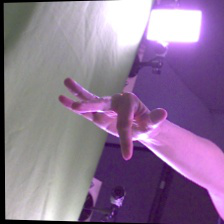

In [518]:
# Plot hand 2D batch example
from src.utils.data_utils import Hand
import torchvision

dataset = HandposeDataset(root="../data", transforms=torchvision.transforms.ToTensor())
dataloader = DataLoader(
    dataset=dataset,
    batch_size=8,
    shuffle=False
)

x_image, x_camera, y_points = next(iter(dataloader)) 
y_points_2d = Hand.to_2d_points(y_points, x_camera)

print(y_points_2d.shape)
Hand.plot_2d(x_image, y_points_2d, y_points_2d+torch.rand((8, 21, 2))*5).show()

In [524]:
x = torch.rand((8, 42, 128, 128))

print(x[:,21:].shape)

torch.Size([8, 21, 128, 128])
